Plot validations curve for each model. Training model and get an average accuracy / matrix confusion.

Configuration : 

In [1]:
import numpy as np
import sys
import math
import random
import Model
import Utils
import DataManager as DM  

Loading the database :


In [2]:
print("Loading Database...")
dm = DM.DataManager(150, 50, normalisation=False)
x_train, t_train, x_test, t_test = dm.generer_donnees()
print("Done")

Loading Database...
Done


Initialize the analyzer

In [3]:
analyzer = Utils.ModelAnalyzer()
x = x_train
t = t_train

In [4]:
# Number of training to do per model
k = 5
# Set figure size


Hyperparameters of the model Perceptron (model1) :
alpha(reg) : 10^-3 to 10^3 log scale

model Perceptron
Initialize model Perceptron
The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.25021535 0.19634843 0.17991434 0.16345316 0.16345316 0.16345316
 0.16345316]
The train scores std are :  [0.05513941 0.03908341 0.00787888 0.01262226 0.01262226 0.01262226
 0.01262226]
The test scores means are :  [0.20463285 0.16009804 0.14630494 0.15320149 0.15320149 0.15320149
 0.15320149]
The test scores std are :  [0.0461856  0.02471361 0.02358797 0.01247059 0.01247059 0.01247059
 0.01247059]
0
Best alpha for the Perceptron is  0.001


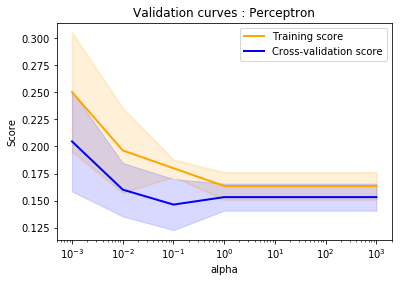

In [5]:
print("model Perceptron")

model1 = Model.Perceptron(reg_penalty='l2', reg=0.001)
para_range = np.logspace(-3, 3, 7)
titleVC = "Validation curves : Perceptron"
plt, test_scores_alpha_means = analyzer.plotValidationCurve(model1.model, x, t, title=titleVC, param_name="alpha",param_range=para_range, verbose=True, scaling="log")
    
bestInd = np.argmax(test_scores_alpha_means)
print(bestInd)
    
model1Alpha = para_range[bestInd]
print("Best alpha for the Perceptron is ", model1Alpha)
plt.rcParams['figure.figsize'] = [12.0, 10.0]
plt.show()

Training of the model Perceptron  :

In [6]:
# Set hyperparameters of the Perceptron model 
hyp1Mod1 = model1Alpha
print("Training with the parameter (alpha) :", hyp1Mod1)

bestAccuMod1 = 0
bestConfMaxMod1 = 0
bestModel1 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " Perceptron model")
    md1 = Model.Perceptron(reg_penalty='l2', reg=hyp1Mod1, random_state=i)
    md1.train(x_train, t_train)
    predictions_test = np.array([md1.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod1:
        bestAccuMod1 = accu[i]
        bestModel1 = md1
        bestConfMaxMod1 = analyzer.confusionMatrix(t_test, predictions_test)

# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod1)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod1)


Training with the parameter (alpha) : 0.001
Training  1  Perceptron model
Initialize model Perceptron
Training  2  Perceptron model
Initialize model Perceptron
Training  3  Perceptron model
Initialize model Perceptron
Training  4  Perceptron model
Initialize model Perceptron
Training  5  Perceptron model
Initialize model Perceptron
[0.2  0.22 0.18 0.12 0.2 ]
The average accuracy is :  0.18400000000000002
The std accuracu is :  0.034409301068170514
The best accuracy is :  0.22
The confusion matrix of the best model : 
[[0 0 8 0 0 0 2]
 [0 0 6 0 0 0 2]
 [0 0 9 0 0 0 0]
 [0 0 3 0 0 0 0]
 [0 0 5 0 0 0 0]
 [0 0 9 0 0 0 0]
 [0 0 4 0 0 0 2]]


Hidden layer to test : 
model 2a(200,) model2b (200,200,200) model 2c(200,400,600) model2d (600,)

Hyperparameters of the multilayer Perceptron(model 2a) :
alpha(reg) : 10^-3 to 10^3

validation curve model Multilayer Perceptron 
[0. 0. 0. 0.]
Initialize model Multi-layer Perceptron
The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.166829   0.166829   0.166829   0.166829   0.16182831 0.63808229
 0.67430498]
The train scores std are :  [0.01630582 0.01630582 0.01630582 0.01630582 0.01833302 0.17026953
 0.07920673]
The test scores means are :  [0.16793214 0.16793214 0.16793214 0.16793214 0.16148053 0.34531129
 0.35103482]
The test scores std are :  [0.07123852 0.07123852 0.07123852 0.07123852 0.07578492 0.10146356
 0.07544013]
6
Best alpha for the Multilayer Perceptron with  (200,)  is  1000.0


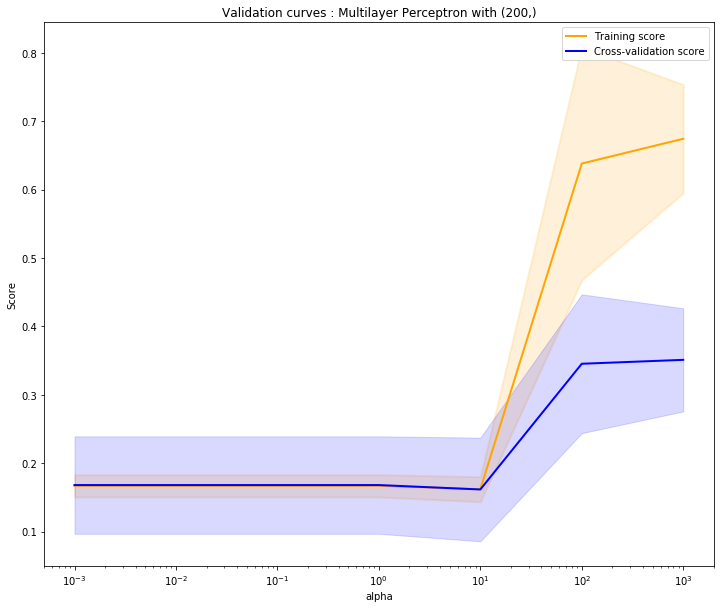

Initialize model Multi-layer Perceptron


/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWar

The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.29988983 0.28994074 0.28837146 0.29159364 0.35782372 0.66329584
 0.3707765 ]
The train scores std are :  [0.03957313 0.01761729 0.0135482  0.01786153 0.07127242 0.15719836
 0.15065679]
The test scores means are :  [0.25655225 0.26369511 0.27014672 0.27014672 0.25316128 0.29946959
 0.29398779]
The test scores std are :  [0.06897571 0.06202998 0.06909432 0.06909432 0.08382273 0.07581133
 0.10193737]
5
Best alpha for the Multilayer Perceptron with  (200, 200, 200)  is  100.0


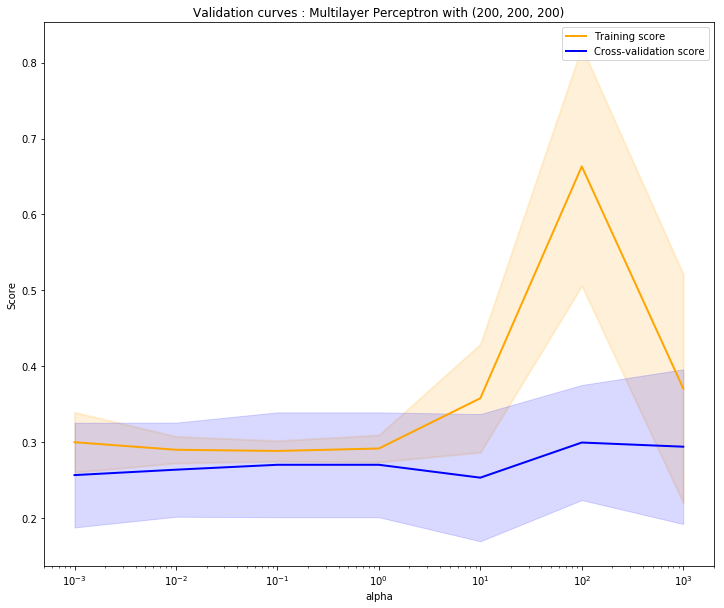

Initialize model Multi-layer Perceptron


/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.24693434 0.26000682 0.26821477 0.26647827 0.29766688 0.55125113
 0.32481558]
The train scores std are :  [0.04487964 0.04111489 0.04802483 0.05664395 0.10198212 0.16683448
 0.03285712]
The test scores means are :  [0.24798429 0.23374625 0.23374625 0.20547506 0.27423568 0.30601197
 0.346212  ]
The test scores std are :  [0.04943041 0.0298329  0.0298329  0.06203824 0.03700461 0.02764156
 0.03975668]
6
Best alpha for the Multilayer Perceptron with  (200, 400, 600)  is  1000.0


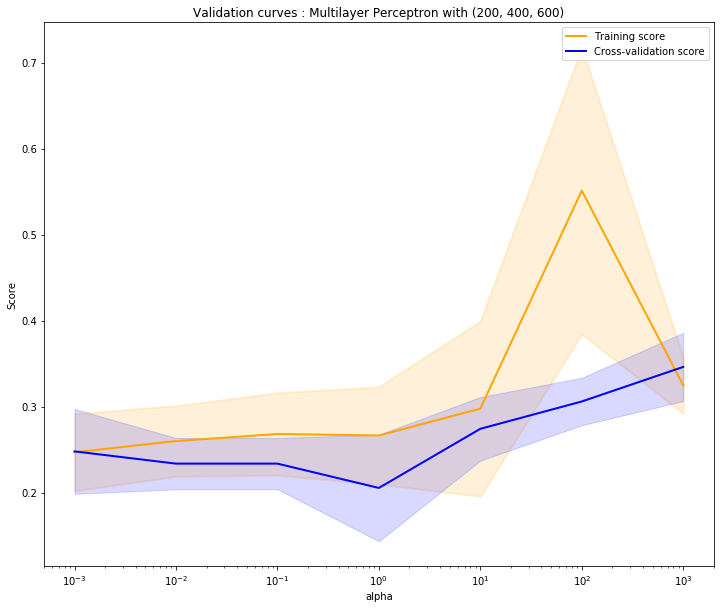

Initialize model Multi-layer Perceptron
The param is :  alpha
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.35349666 0.34689701 0.34518761 0.34682695 0.34518761 0.75653406
 0.60980018]
The train scores std are :  [0.02446258 0.02734054 0.02624277 0.02370709 0.02624277 0.20278041
 0.09318876]
The test scores means are :  [0.25266241 0.24551955 0.24551955 0.25266241 0.24551955 0.30640298
 0.36946294]
The test scores std are :  [0.04577947 0.05795071 0.05795071 0.04577947 0.05795071 0.02494118
 0.06961399]
6
Best alpha for the Multilayer Perceptron with  (600,)  is  1000.0


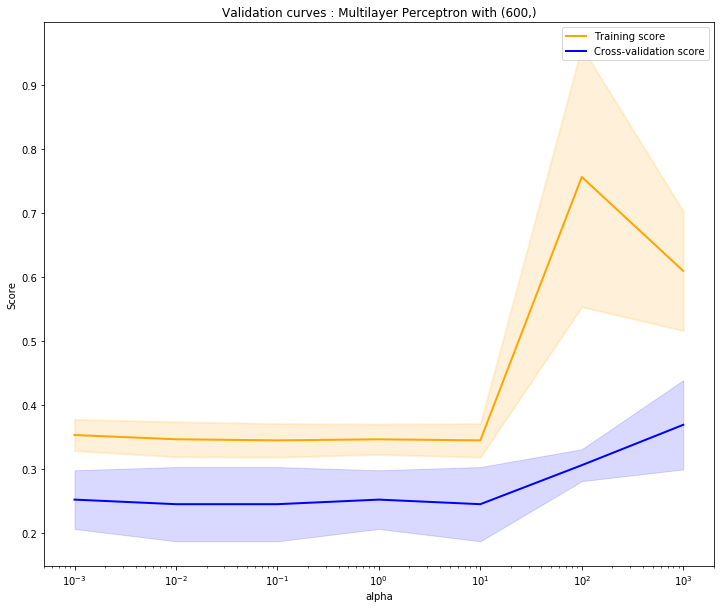

In [7]:
print("validation curve model Multilayer Perceptron ")

list_tuple = [(200,), (200,200,200), (200,400,600), (600,)]
z = 0
model2Alpha = np.zeros(4)
print(model2Alpha)
for specific_tuple in list_tuple:

    model2 = Model.MLPerceptron(hidden_layer_sizes=specific_tuple, activation='relu', reg=0.001)
    para_range = np.logspace(-3, 3, 7)
    titleVC = "Validation curves : Multilayer Perceptron with " + str(specific_tuple)
    plt, test_scores_mlp_alpha_means = analyzer.plotValidationCurve(model2.model, x, t, title=titleVC, param_name="alpha",param_range=para_range, verbose=True, scaling="log")
    
    bestInd = np.argmax(test_scores_mlp_alpha_means)
    print(bestInd)
    
    model2Alpha[z] = para_range[bestInd]
    print("Best alpha for the Multilayer Perceptron with ", specific_tuple, " is ", model2Alpha[z])
    
    plt.show()
    z = z + 1
    

Training of the model multilayer Perceptron (model 2a) :

In [8]:


list_tuple = [(200,), (200,200,200), (200,400,600), (600,)]
z = 0
bestModel2 = [Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1), Model.MLPerceptron(hidden_layer_sizes=1) ]

for specific_tuple in list_tuple:
    # Set hyperparameters of the multilayer Perceptron (model2a)
    hyp1Mod2 = model2Alpha[z]
    print("Training with the parameter (alpha) :", hyp1Mod2)

    # Training
    accu = np.zeros(k)

    for i in range(k):
        bestAccuMod2 = 0
        bestConfMaxMod2 = 0
        bestModel2 =  0
        print("Training ", i+1, " multi-layer Perceptron with ", str(specific_tuple) )
        md2 = Model.MLPerceptron(hidden_layer_sizes=specific_tuple, activation='relu', reg=hyp1Mod2, random_state=i) 
        md2.train(x_train, t_train)
        predictions_test = np.array([md2.prediction(x) for x in x_test])

        accu[i] = analyzer.accuracy(t_test, predictions_test)
    
        if accu[i] > bestAccuMod2:
            bestAccuMod2 = accu[i]
            if z == 0:
                bestModel2a = md2
            if z == 1:
                bestModel2b = md2
            if z == 2:
                bestModel2c = md2
            if z == 3:
                bestModel2d = md2
            bestConfMaxMod2 = analyzer.confusionMatrix(t_test, predictions_test)

    # Average accuracy and  std accuracy
    print(accu)
    accuMean = np.mean(accu)
    accuStd = np.std(accu)
    print("The average accuracy is : ", accuMean)
    print("The std accuracu is : ", accuStd)
    print("The best accuracy is : ", bestAccuMod2)
    print("The confusion matrix of the best model : ")
    print(bestConfMaxMod2)
    z = z+1


Initialize model Multi-layer Perceptron
Initialize model Multi-layer Perceptron
Initialize model Multi-layer Perceptron
Initialize model Multi-layer Perceptron
Training with the parameter (alpha) : 1000.0
Training  1  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
Training  2  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
Training  3  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
Training  4  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
Training  5  multi-layer Perceptron with  (200,)
Initialize model Multi-layer Perceptron
[0.28 0.28 0.28 0.32 0.16]
The average accuracy is :  0.264
The std accuracu is :  0.05425863986500215
The best accuracy is :  0.16
The confusion matrix of the best model : 
[[1 0 0 2 1 2 4]
 [1 1 0 2 0 1 3]
 [0 0 0 2 2 3 2]
 [0 0 2 0 1 0 0]
 [1 0 0 1 1 1 1]
 [1 0 1 5 1 1 0]
 [1 0 0 0 0 1 4]]
Training with the parameter (alpha) : 100.0
Training  1 

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Training  2  multi-layer Perceptron with  (200, 400, 600)
Initialize model Multi-layer Perceptron
Training  3  multi-layer Perceptron with  (200, 400, 600)
Initialize model Multi-layer Perceptron
Training  4  multi-layer Perceptron with  (200, 400, 600)
Initialize model Multi-layer Perceptron
Training  5  multi-layer Perceptron with  (200, 400, 600)
Initialize model Multi-layer Perceptron
[0.28 0.26 0.28 0.26 0.28]
The average accuracy is :  0.272
The std accuracu is :  0.00979795897113272
The best accuracy is :  0.28
The confusion matrix of the best model : 
[[3 1 0 0 3 0 3]
 [0 2 0 0 2 0 4]
 [1 1 0 2 3 0 2]
 [0 0 0 2 1 0 0]
 [2 1 0 0 2 0 0]
 [1 1 0 1 6 0 0]
 [1 0 0 0 0 0 5]]
Training with the parameter (alpha) : 1000.0
Training  1  multi-layer Perceptron with  (600,)
Initialize model Multi-layer Perceptron
Training  2  multi-layer Perceptron with  (600,)
Initialize model Multi-layer Perceptron
Training  3  multi-layer Perceptron with  (600,)
Initialize model Multi-layer Perceptron
Tr

Rbf ou poly ??

Hyperparameters of the model SVM(model 3)(rbf) :
 C : 10^-3 to 10^3 log scale

Initialize model SVM
The param is :  C
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.2075179 0.2075179 0.2075179 1.        1.        1.        1.       ]
The train scores std are :  [0.06719606 0.06719606 0.06719606 0.         0.         0.
 0.        ]
The test scores means are :  [0.1672409 0.1672409 0.1672409 0.1672409 0.1672409 0.1672409 0.1672409]
The test scores std are :  [0.00963958 0.00963958 0.00963958 0.00963958 0.00963958 0.00963958
 0.00963958]
0
Best c is :  0.001


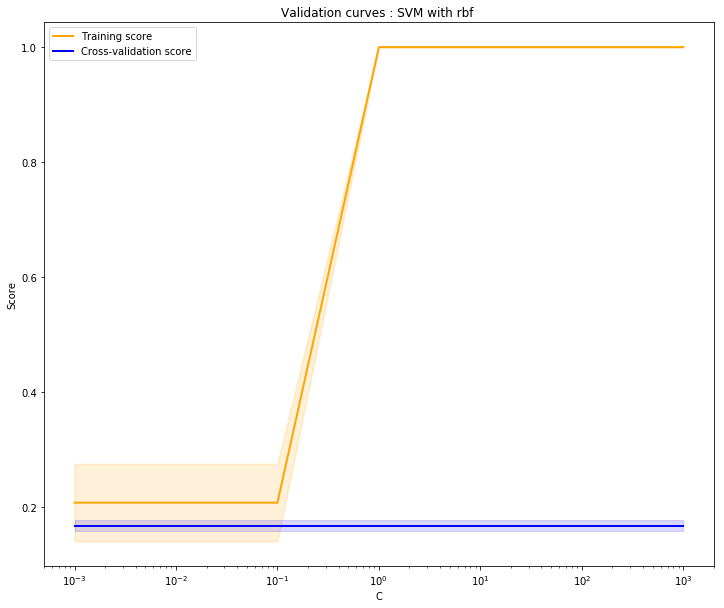

In [9]:
bestCMod3 = 1

model3 = Model.ModelSVM(gamma="auto",  kernel="rbf")
para_range = np.logspace(-3, 3, 7)
titleVC = "Validation curves : SVM with rbf "
plt, test_scores_deg_means = analyzer.plotValidationCurve(model3.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")
    
bestInd = np.argmax(test_scores_deg_means)
print(bestInd)
    
model3Reg = para_range[bestInd]
print("Best c is : ",model3Reg)
    
plt.show()
    

Training of the model SVM (model 3) :

In [10]:
# Set hyperparameters of the SVM model
hyp2Mod3 = bestCMod3
print("Training with the parameters (C) :", hyp2Mod3)

bestAccuMod3 = 0
bestConfMaxMod3 = 0
bestModel3 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model SVM with rbf...")
    md3 = Model.ModelSVM(gamma="auto",  kernel="rbf", reg=hyp2Mod3, random_state=i)
    md3.train(x_train, t_train)
    predictions_test = np.array([md3.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod3:
        bestAccuMod3 = accu[i]
        bestModel3 = md3
        bestConfMaxMod3 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod3)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod3)


Training with the parameters (C) : 1
Training  1  model SVM with rbf...
Initialize model SVM
Training  2  model SVM with rbf...
Initialize model SVM
Training  3  model SVM with rbf...
Initialize model SVM
Training  4  model SVM with rbf...
Initialize model SVM
Training  5  model SVM with rbf...
Initialize model SVM
[0.2 0.2 0.2 0.2 0.2]
The average accuracy is :  0.2
The std accuracu is :  0.0
The best accuracy is :  0.2
The confusion matrix of the best model : 
[[10  0  0  0  0  0  0]
 [ 8  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0]
 [ 3  0  0  0  0  0  0]
 [ 5  0  0  0  0  0  0]
 [ 9  0  0  0  0  0  0]
 [ 6  0  0  0  0  0  0]]


Hyperparameters of the model data tree classifier (model 4) : criterion= 'gini' or 'entropy' and max depth = 2 to 40

Initialize the model Decision Tree Classifier... 
The param is :  max_depth
The param range is :  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40.]
The train scores means are :  [0.54871876 0.69343249 0.80015106 0.88840526 0.95519896 0.9834258
 0.99176263 0.99836066 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
The train scores std are :  [0.03983838 0.01336076 0.01783138 0.02208368 0.0195253  0.01371019
 0.0073618  0.00327869 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        

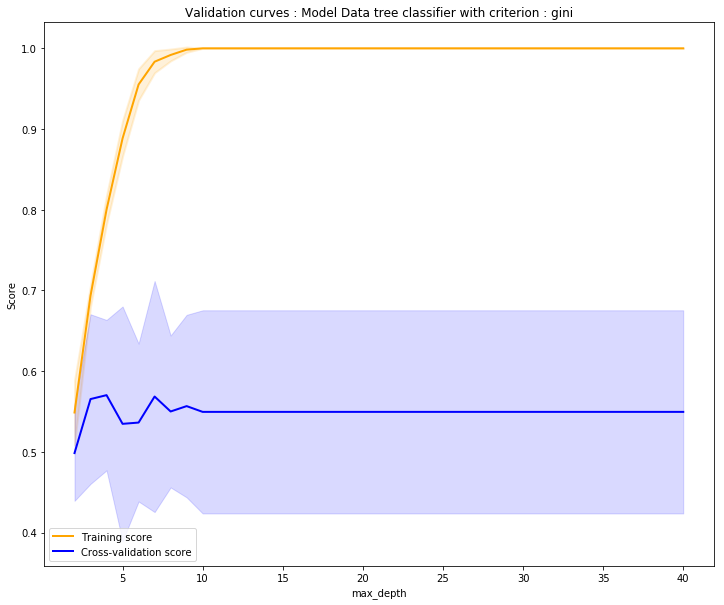

Initialize the model Decision Tree Classifier... 
The param is :  max_depth
The param range is :  [ 2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18. 19.
 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36. 37.
 38. 39. 40.]
The train scores means are :  [0.54871876 0.69343249 0.80015106 0.88840526 0.95519896 0.9834258
 0.99176263 0.99836066 1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.         1.         1.         1.
 1.         1.         1.        ]
The train scores std are :  [0.03983838 0.01336076 0.01783138 0.02208368 0.0195253  0.01371019
 0.0073618  0.00327869 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.        

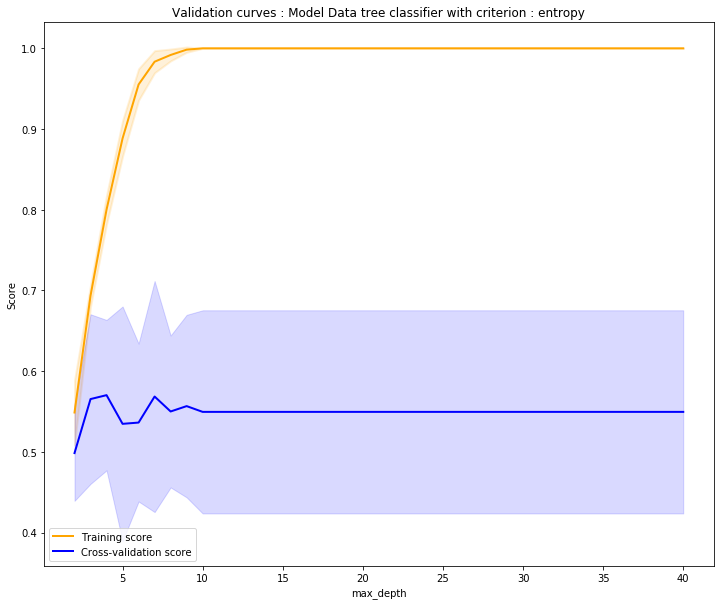

The best parameter are (criterion, max_depth) : gini 4.0


In [11]:
bestCritMod4 = 'gini'
bestMaxDepthMod4 = 2
bestTestScore = float('inf')
dicCriteria = ['gini', 'entropy']

for cri in dicCriteria:
    para_range = np.linspace(2, 40, 39)
    titleVC = "Validation curves : Model Data tree classifier with criterion : " + cri
    model4 = Model.ModelDecisionTree()
    plt, test_scores_means_md = analyzer.plotValidationCurve(model4.model, x, t, title=titleVC, param_name="max_depth",param_range=para_range, verbose=True, scaling="lin")
    
    bestInd = np.argmax(test_scores_means_md)
    print(bestInd)
    model4Maxdepth = para_range[bestInd]
    
    print("Best maxdepth with criterion ", cri ," is : ",model4Maxdepth)
    plt.show()    
    
    if test_scores_means_md[bestInd] < bestTestScore:
        bestTestScore = test_scores_means_md[bestInd]
        bestCritMod4 = cri
        bestMaxDepthMod4 = model4Maxdepth
        
print("The best parameter are (criterion, max_depth) :", bestCritMod4, bestMaxDepthMod4)

Training of the model Data tree classifier :

In [12]:
# Set hyperparameters of the model data tree classifier
hyp1Mod4 = bestCritMod4
hyp2Mod4 = bestMaxDepthMod4

bestAccuMod4 = 0
bestConfMaxMod4 = 0
bestModel4 =  0

# Training 
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model data tree classifier...")
    md4 = Model.ModelDecisionTree(max_depth=hyp2Mod4, criterion=hyp1Mod4, random_state=i)
    md4.train(x_train, t_train)
    predictions_test = np.array([md4.prediction(x.reshape(1, -1)) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)

    if accu[i] > bestAccuMod4:
        bestAccuMod4 = accu[i]
        bestModel4 = md4
        bestConfMaxMod4 = analyzer.confusionMatrix(t_test, predictions_test)

    
# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod4)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod4)


Training  1  model data tree classifier...
Initialize the model Decision Tree Classifier... 
Training  2  model data tree classifier...
Initialize the model Decision Tree Classifier... 
Training  3  model data tree classifier...
Initialize the model Decision Tree Classifier... 
Training  4  model data tree classifier...
Initialize the model Decision Tree Classifier... 
Training  5  model data tree classifier...
Initialize the model Decision Tree Classifier... 
[0.6 0.6 0.6 0.6 0.6]
The average accuracy is :  0.6
The std accuracu is :  0.0
The best accuracy is :  0.6
The confusion matrix of the best model : 
[[9 0 0 0 0 0 1]
 [0 4 2 0 2 0 0]
 [0 0 4 1 2 2 0]
 [0 0 0 2 0 1 0]
 [0 0 1 0 4 0 0]
 [0 0 4 2 0 3 0]
 [2 0 0 0 0 0 4]]


Hyperparameters of the Logistic Regression (Model 5) : C : 10^-3 to 10^3

Validation curve Logistic Regression (model 5)
Initialize model Logistic Regression
The param is :  C
The param range is :  [1.e-03 1.e-02 1.e-01 1.e+00 1.e+01 1.e+02 1.e+03]
The train scores means are :  [0.65126797 0.68962303 0.75651387 0.81816445 0.87663744 0.90487946
 0.89976644]
The train scores std are :  [0.03212258 0.02839222 0.01455609 0.01720107 0.0099827  0.01627532
 0.02167656]
The test scores means are :  [0.50188401 0.51000751 0.55059855 0.60857856 0.58114331 0.54247047
 0.55375574]
The test scores std are :  [0.10012495 0.06723481 0.06242599 0.08367694 0.11767975 0.10420234
 0.12858631]
3
Best C for the logistic Regression is  1.0


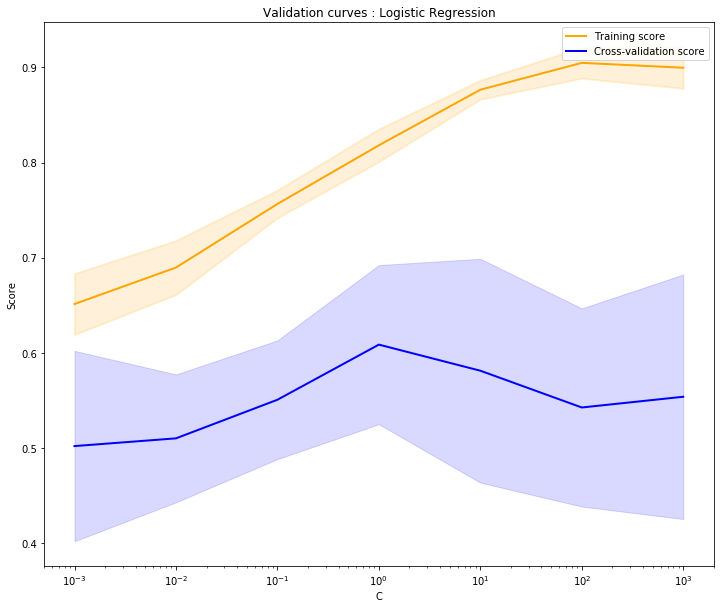

In [13]:
print("Validation curve Logistic Regression (model 5)")

model5 = Model.LogisticRegression(reg_penalty='l2', reg_inv=1.0)
para_range = np.logspace(-3, 3, 7)
titleVC = "Validation curves : Logistic Regression"
plt, test_scores_C_means = analyzer.plotValidationCurve(model5.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")

bestInd = np.argmax(test_scores_C_means)
print(bestInd)
    
model5C = para_range[bestInd]
print("Best C for the logistic Regression is ", model5C)
    
plt.show()

Training of the Logistic Regression (Model 5) :

In [14]:
# Set hyperparameters of the Logistic Regression (Model 5)
hyp1Mod5 = model5C

bestAccuMod5 = 0
bestConfMaxMod5 = 0
bestModel5 =  0

#Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model Logistic Regression...")
    md5 = Model.LogisticRegression(reg_penalty='l2', reg_inv=hyp1Mod5, random_state=i)
    md5.train(x_train, t_train)
    predictions_test = np.array([md5.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    if accu[i] > bestAccuMod5:
        bestAccuMod5 = accu[i]
        bestModel5 = md5
        bestConfMaxMod5 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod5)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod5)


Training  1  model Logistic Regression...
Initialize model Logistic Regression
Training  2  model Logistic Regression...
Initialize model Logistic Regression
Training  3  model Logistic Regression...
Initialize model Logistic Regression
Training  4  model Logistic Regression...
Initialize model Logistic Regression
Training  5  model Logistic Regression...
Initialize model Logistic Regression
[0.56 0.56 0.56 0.56 0.56]
The average accuracy is :  0.56
The std accuracu is :  0.0
The best accuracy is :  0.56
The confusion matrix of the best model : 
[[8 1 0 0 0 0 1]
 [1 4 0 0 2 1 0]
 [0 1 2 3 2 1 0]
 [0 0 0 2 0 1 0]
 [0 1 0 0 4 0 0]
 [0 0 1 2 3 3 0]
 [0 1 0 0 0 0 5]]


Training of the model Bagging (model 6) :

In [15]:
# Setting up base model

base_model = 'Perceptron'
number_model = 50
bestAccuMod6 = 0
bestConfMaxMod6 = 0
bestModel6 =  0

# Training 
accu = np.zeros(k)

for j in range(k):
    print("Training ", j+1, " Bagging model..." )
    md6 = Model.Bagging(base_model=base_model, number_model=number_model, reg_penalty='l2', reg=hyp1Mod1,random_state=i)
    md6.train(x_train, t_train)
    predictions_test = np.array([md6.prediction(x) for x in x_test])

    accu[j] = analyzer.accuracy(t_test, predictions_test)
    if accu[j] > bestAccuMod6:
        bestAccuMod6 = accu[j]
        bestModel6 = md6
        bestConfMaxMod6 = analyzer.confusionMatrix(t_test, predictions_test)
    
# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod6)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod6)

Training  1  Bagging model...
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model Perceptron
Initialize model P

Learning curves of each model with the best model : 

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

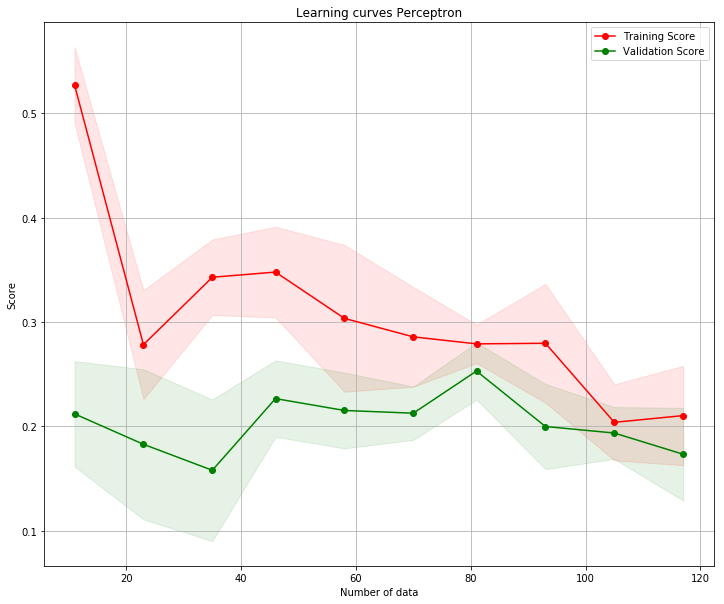

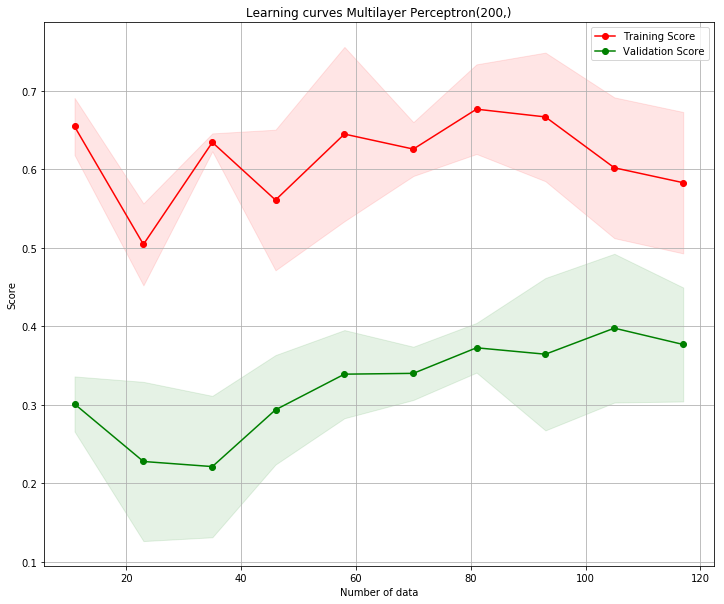

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

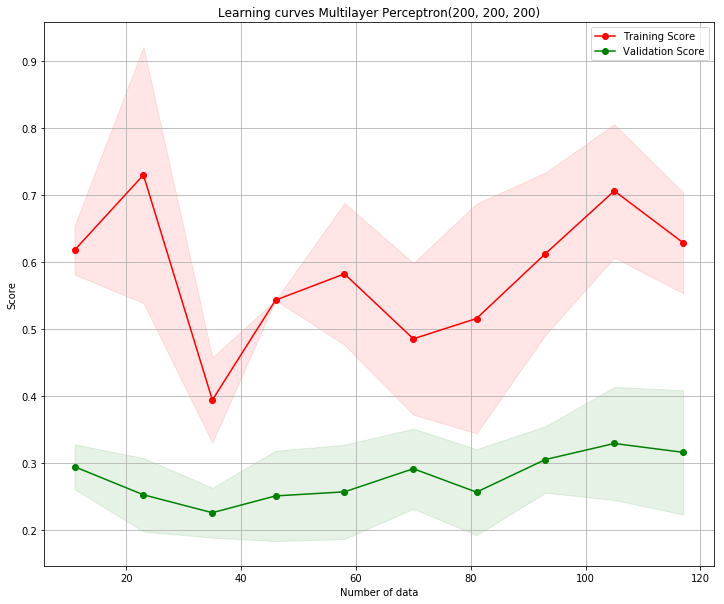

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/s

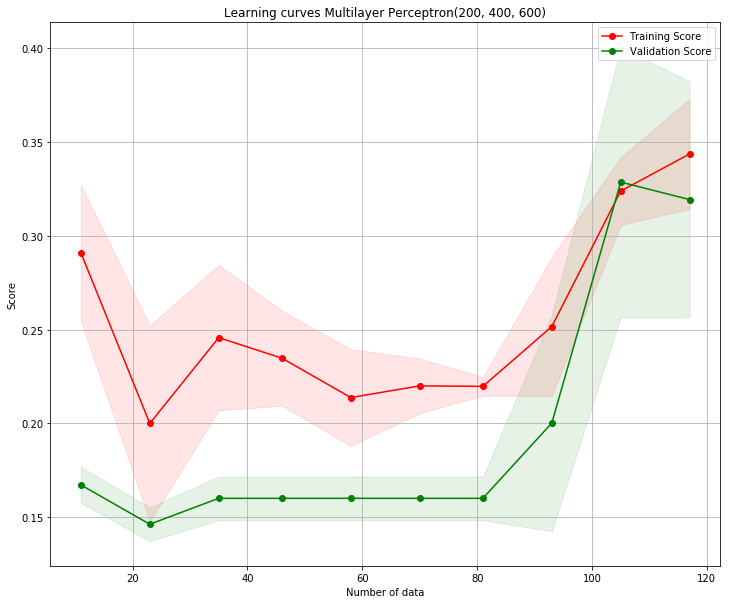

/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")
/usr/lib/python3/dist-packages/sklearn/neural_network/multilayer_perceptron.py:566: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


KeyboardInterrupt: 

In [16]:
titleLc1 = "Learning curves Perceptron"
analyzer.plotLearningCurves(bestModel1.model, x, t, title=titleLc1)

z=0
for specific_tuple in list_tuple:
    
    if z == 0:
        bestModel2 = bestModel2a
    if z == 1:
        bestModel2 = bestModel2b
    if z == 2:
        bestModel2 = bestModel2c
    if z == 3:
        bestModel2 = bestModel2d
    
    titleLc2 = "Learning curves Multilayer Perceptron" + str(specific_tuple)
    analyzer.plotLearningCurves(bestModel2.model, x, t, title=titleLc2)
    plt.show()
    z= z+1
    
titleLc3 = "Learning curves SVM with rbf"
analyzer.plotLearningCurves(bestModel3.model, x, t, title=titleLc3)
plt.show()
   
titleLc4 = "Learning curves Data tree classifier"
analyzer.plotLearningCurves(bestModel4.model, x, t, title=titleLc4)
plt.show()

titleLc5 = "Learning curves Logistic Regression"
analyzer.plotLearningCurves(bestModel5.model, x, t, title=titleLc5)
plt.show()

titleLc6 = "Learning curves Bagging"
analyzer.plotLearningCurves(bestModel6.model, x, t, title=titleLc6)
plt.show()

Hyperparameters SVM with poly kernel :
deg : 1 to 3
C : 10^-3 to 10^3

In [ ]:
minDeg = 1
maxDeg = 4
print(range(minDeg, maxDeg))
bestDegMod7 = 1
bestCMod7 = 1
bestTestScore = float("inf")

for deg in range(minDeg, maxDeg):
    model7 = Model.ModelSVM(gamma="auto",  kernel="poly", degree=1)
    para_range = np.logspace(-3, 3, 7)
    titleVC = "Validation curves : SVM with degree " + str(deg)
    plt, test_scores_deg_means = analyzer.plotValidationCurve(model7.model, x, t, title=titleVC, param_name="C",param_range=para_range, verbose=True, scaling="log")
    
    bestInd = np.argmax(test_scores_deg_means)
    print(bestInd)
    
    model7Reg = para_range[bestInd]
    print("Best c for the degree ", deg, " is : ",model7Reg)
    
    plt.show()
    
    if test_scores_deg_means[bestInd] < bestTestScore:
        bestTestScore
        bestCMod7 = mode73Reg
        bestDegMod7 = deg

print("The best parameter are (deg, C) :", bestDegMod7, bestCMod7)

Training model SVM with poly kernel : 

In [ ]:
# Set hyperparameters of the SVM model
hyp1Mod7 = bestDegMod7
hyp2Mod7 = bestCMod7
print("Training with the parameters (deg, C) :", hyp1Mod7, hyp2Mod7)

bestAccuMod7 = 0
bestConfMaxMod7 = 0
bestModel7 =  0

# Training
accu = np.zeros(k)

for i in range(k):
    print("Training ", i + 1, " model SVM...")
    md7 = Model.ModelSVM(gamma="auto",  kernel="poly", degree=hyp1Mod7, reg=hyp2Mod7, random_state=i)
    md7.train(x_train, t_train)
    predictions_test = np.array([md7.prediction(x) for x in x_test])

    accu[i] = analyzer.accuracy(t_test, predictions_test)
    
    if accu[i] > bestAccuMod7:
        bestAccuMod7 = accu[i]
        bestModel7 = md7
        bestConfMaxMod7 = analyzer.confusionMatrix(t_test, predictions_test)


# Average accuracy and  std accuracy
print(accu)
accuMean = np.mean(accu)
accuStd = np.std(accu)
print("The average accuracy is : ", accuMean)
print("The std accuracu is : ", accuStd)
print("The best accuracy is : ", bestAccuMod7)
print("The confusion matrix of the best model : ")
print(bestConfMaxMod7)

Learning curves SVM(poly):

In [ ]:
titleLc7 = "Learning curves SVM with poly"
analyzer.plotLearningCurves(bestModel7.model, x, t, titleLc7)
plt.show()